## Importações

In [33]:
import pandas as pd
from math import floor
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from sklearn.naive_bayes import GaussianNB


In [34]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer, make_column_selector

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score,classification_report, f1_score, confusion_matrix,recall_score,precision_score

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold,train_test_split,cross_validate

In [35]:
from sklearn import tree

## Extraindo a Base

In [36]:
df_original = pd.read_excel('..\dados\df_original.xlsx')

df = df_original.copy()

display(df)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation,Normal_Weight
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation,Obesity_Type_III


## Funções dos Modelos

### Bayes

In [37]:
def funcBayes(X_train, X_test, y_train):
    classificador_bayes = GaussianNB()
    classificador_bayes.fit(X_train, y_train)
    classificar = classificador_bayes.predict(X_test)
    return classificar

### Decision Tree

In [38]:
def funcDecisionTreeEntropy(X_train, X_test, y_train):
    modelo_gini = tree.DecisionTreeClassifier(criterion='gini')
    modelo_gini.fit(X_train, y_train)
    classificar = modelo_gini.predict(X_test)
    return classificar

def funcDecisionTreeGini(X_train, X_test, y_train):
    modelo_entropy= tree.DecisionTreeClassifier(criterion='entropy')
    modelo_entropy.fit(X_train, y_train)
    classificar = modelo_entropy.predict(X_test)
    return classificar

### KNN 

In [39]:
def funcKnn(X_train, X_test, y_train,k):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train,y_train)
    classificar = modelo.predict(X_test)
    return classificar

## Funções Comuns

In [40]:
def funcPlotMatriz(y_test, classificar):
    matriz_de_confusao = confusion_matrix(y_test, classificar)
    sns.heatmap(matriz_de_confusao, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
    plt.show()


def funcMetricas(modelo_Versao,df_metricas, y_test, classificar):
    metricas = [
        modelo_Versao,
        accuracy_score(y_test, classificar), 
        round(recall_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(precision_score(y_test, classificar, pos_label=0,average='macro'),2),
        round(f1_score(y_test, classificar, pos_label=0,average='macro'),2)
        ]
    
    nova_linha_df = pd.DataFrame([metricas], columns=df_metricas.columns)

    df_metricas = pd.concat([df_metricas, nova_linha_df], ignore_index=True)
    
    return df_metricas



## Manipulando os Dados

### Separando os DataFrames

In [41]:
df_x = df.iloc[:, :-1]

df_y = df.iloc[:, -1]

df_y = pd.DataFrame(df_y)
display(df_x)
display(df_y)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.620000,64.000000,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public_Transportation
1,Female,21,1.520000,56.000000,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public_Transportation
2,Male,23,1.800000,77.000000,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public_Transportation
3,Male,27,1.800000,87.000000,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking
4,Male,22,1.780000,89.800000,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,3,3,Sometimes,no,2,no,2,1,Sometimes,Public_Transportation
2107,Female,21,1.748584,133.742943,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation
2108,Female,22,1.752206,133.689352,yes,yes,3,3,Sometimes,no,2,no,1,1,Sometimes,Public_Transportation
2109,Female,24,1.739450,133.346641,yes,yes,3,3,Sometimes,no,3,no,1,1,Sometimes,Public_Transportation


,NObeyesdad
0,Normal_Weight
1,Normal_Weight
2,Normal_Weight
3,Overweight_Level_I
4,Overweight_Level_II
...,...
2106,Obesity_Type_III
2107,Obesity_Type_III
2108,Obesity_Type_III
2109,Obesity_Type_III


### Transformando os Dados

In [42]:
label_encolder = LabelEncoder()

preprocessador = ColumnTransformer(
    transformers=[
        ('categoria', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))
    ],
    remainder='passthrough',  # Mantém as outras colunas inalteradas
    verbose_feature_names_out=False,  # Mantém os nomes originais das colunas
    
)

# Ajustar e transformar o DataFrame usando o preprocessador
df_x_encoded = preprocessador.fit_transform(df_x)

df_y_encoded = label_encolder.fit_transform(df_y)
# Se necessário, converter o resultado de volta para um DataFrame, mantendo os nomes das colunas
df_x_encoded = pd.DataFrame(df_x_encoded, columns=preprocessador.get_feature_names_out())
df_y_encoded = pd.DataFrame(df_y_encoded, columns=df_y.columns)

df_x_encoded=df_x_encoded[df_x.columns]

display(df_x_encoded)
display(df_y_encoded)

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0.0,21.0,1.620000,64.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,0.0,1.0,3.0,3.0
1,0.0,21.0,1.520000,56.000000,1.0,0.0,3.0,3.0,2.0,1.0,3.0,1.0,3.0,0.0,2.0,3.0
2,1.0,23.0,1.800000,77.000000,1.0,0.0,2.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,1.0,3.0
3,1.0,27.0,1.800000,87.000000,0.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,0.0,1.0,4.0
4,1.0,22.0,1.780000,89.800000,0.0,0.0,2.0,1.0,2.0,0.0,2.0,0.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.0,20.0,1.710730,131.408528,1.0,1.0,3.0,3.0,2.0,0.0,2.0,0.0,2.0,1.0,2.0,3.0
2107,0.0,21.0,1.748584,133.742943,1.0,1.0,3.0,3.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,3.0
2108,0.0,22.0,1.752206,133.689352,1.0,1.0,3.0,3.0,2.0,0.0,2.0,0.0,1.0,1.0,2.0,3.0
2109,0.0,24.0,1.739450,133.346641,1.0,1.0,3.0,3.0,2.0,0.0,3.0,0.0,1.0,1.0,2.0,3.0


,NObeyesdad
0,1
1,1
2,1
3,5
4,6
...,...
2106,4
2107,4
2108,4
2109,4


#### Dividindo os DataFrames de Teste e Treino

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df_x_encoded, df_y_encoded, test_size=0.2)

# Salva o array na memoria para guardar a ordem das colunas
X_train = np.ascontiguousarray(X_train)
X_test = np.ascontiguousarray(X_test)

#### Criando um DataFrame para as Métricas

In [44]:
df_metricas = pd.DataFrame(columns=['Modelo_Versao','Acuracia','Recall_Media', 'Precision_Media', 'F1_Score_Media'])

df_metricas

,Modelo_Versao,Acuracia,Recall_Media,Precision_Media,F1_Score_Media


### Primeiro Resultado do Bayes

In [45]:
classificador_bayes = funcBayes(X_train, X_test, y_train)
print(classificador_bayes)

df_metricas = funcMetricas('Bayes_Primeiro',df_metricas, y_test, classificador_bayes)

display(df_metricas)

[0 3 4 3 2 0 3 5 1 2 5 5 5 2 3 3 0 0 3 3 0 2 6 2 3 3 4 3 1 0 1 2 5 3 2 1 2
 5 1 3 2 3 3 6 0 2 4 1 4 4 6 5 6 3 1 3 4 2 3 3 3 1 6 3 3 2 3 0 2 4 0 3 3 0
 5 0 3 3 2 0 4 3 4 4 3 0 4 2 6 3 2 2 0 0 4 2 2 0 4 3 1 2 4 4 3 3 2 3 3 0 5
 5 4 5 0 4 4 3 4 3 6 1 2 4 3 4 3 4 3 0 6 5 6 4 4 2 5 1 2 0 0 0 3 0 3 4 6 4
 4 0 4 0 0 0 4 3 4 4 0 2 1 3 6 0 1 3 0 6 4 2 5 3 2 1 6 3 2 3 2 2 3 2 5 4 3
 2 3 2 0 2 0 0 2 4 3 3 3 4 4 3 2 1 3 2 0 3 3 2 3 2 3 1 2 3 0 3 1 6 4 5 1 2
 2 1 3 1 5 2 2 3 3 4 3 2 2 3 2 3 3 2 5 3 0 4 4 3 5 5 4 4 3 4 5 2 3 1 5 5 2
 3 0 0 3 0 2 0 2 4 3 3 4 2 3 0 0 3 0 5 5 2 2 4 0 1 4 5 4 0 3 5 4 0 1 2 2 2
 2 3 6 3 3 3 3 2 4 4 5 4 6 3 1 3 6 4 0 1 3 0 2 2 3 3 2 4 3 4 4 4 0 2 0 5 2
 6 3 3 2 3 4 2 0 3 3 3 3 3 2 2 4 3 2 3 3 2 2 2 2 5 6 5 4 4 0 2 2 2 3 2 3 4
 3 0 2 3 3 2 3 3 2 6 1 1 2 2 3 5 3 5 2 0 4 6 3 4 0 4 2 6 3 2 4 2 1 1 3 1 4
 3 3 3 0 2 3 3 6 3 5 3 2 3 4 0 3]


c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-pa

,Modelo_Versao,Acuracia,Recall_Media,Precision_Media,F1_Score_Media
0,Bayes_Primeiro,0.56974,0.57,0.58,0.54


### Segunda Etapa do Bayes

KeyError: 'FEV1'

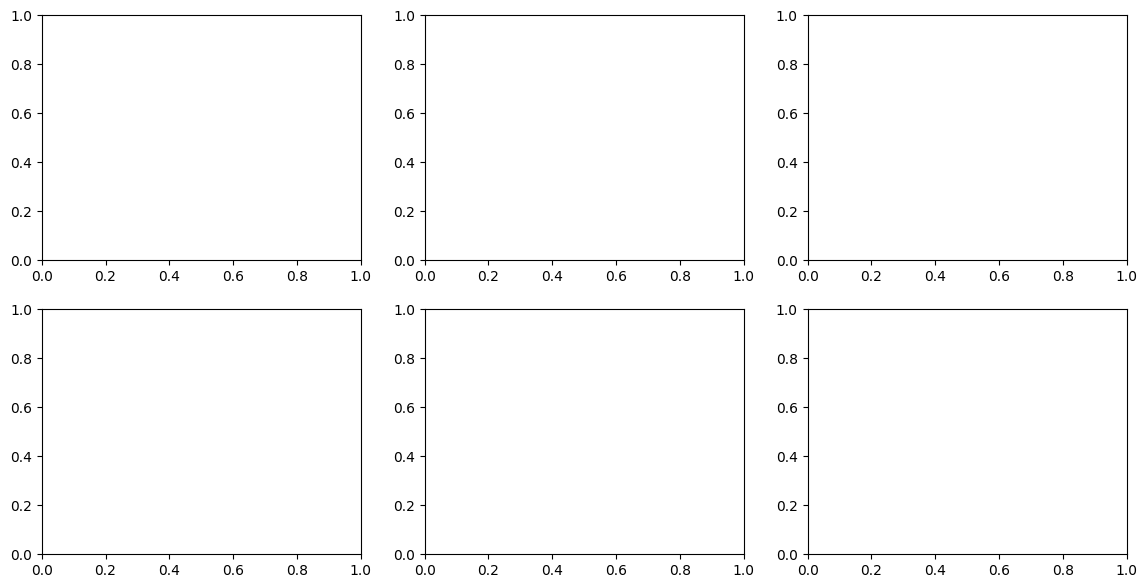

In [46]:
fig, axs = plt.subplots(2, 3, figsize=(14, 7))
sns.kdeplot(df['FEV1'], shade=True, color="b", ax=axs[0, 0])
sns.kdeplot(df['FeNO'], shade=True, color="b", ax=axs[0, 1])
sns.kdeplot(df['BD'], shade=True, color="b", ax=axs[0, 2])
sns.distplot( a=df["FEV1"], hist=True, kde=True, rug=False, ax=axs[1, 0])
sns.distplot( a=df["FeNO"], hist=True, kde=True, rug=False, ax=axs[1, 1])
sns.distplot( a=df["BD"], hist=True, kde=True, rug=False, ax=axs[1, 2])
plt.show()

### Primeiro Resultado com Knn

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


[2 5 2 0 6 3 2 4 0 1 4 0 6 5 0 4 0 5 0 0 6 4 2 2 5 2 3 0 1 0 2 5 2 6 6 2 5
 6 1 3 5 6 3 3 0 6 2 3 2 6 6 1 5 5 2 2 1 5 6 3 5 4 5 4 0 3 5 1 3 6 5 6 4 6
 2 5 5 5 6 2 0 5 0 4 2 0 1 3 6 3 1 0 6 5 1 2 4 1 4 2 5 5 4 0 0 1 5 5 2 3 6
 0 5 4 0 0 5 6 5 0 1 6 5 4 1 4 6 3 0 4 3 0 6 6 1 0 2 3 1 0 5 6 3 4 3 3 2 4
 4 2 4 4 5 5 3 3 6 6 0 0 3 0 6 3 4 1 0 4 6 6 0 6 2 6 6 6 3 5 1 6 6 0 6 4 2
 2 6 1 1 4 4 4 5 6 0 2 5 0 2 4 3 4 0 6 1 2 0 0 2 4 2 2 4 3 0 4 0 0 0 6 6 4
 3 2 6 5 4 3 2 6 4 6 6 5 0 2 2 3 4 2 5 6 0 5 5 1 1 0 0 6 2 0 4 6 2 2 0 4 4
 1 6 0 2 3 2 2 3 3 6 6 3 2 2 0 4 1 2 0 6 3 0 1 2 3 2 4 1 0 4 5 0 3 1 5 3 0
 0 3 2 3 5 6 5 6 5 1 0 5 0 5 4 6 3 5 5 0 3 0 0 3 2 4 6 6 2 2 4 4 1 2 1 2 5
 5 4 3 4 3 0 2 2 5 1 5 4 0 2 0 5 2 1 3 2 5 2 4 6 3 5 5 2 4 0 4 6 2 5 4 5 3
 3 6 3 6 2 5 2 6 3 3 0 4 4 2 0 0 0 4 4 4 1 4 6 6 1 4 3 4 4 0 3 2 5 3 2 4 6
 0 3 3 4 2 5 5 0 3 5 3 0 4 3 2 6]


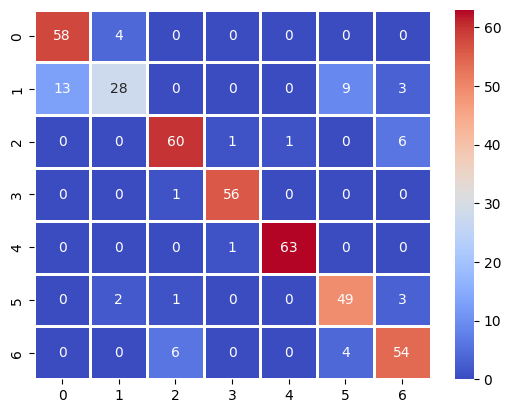

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


,Modelo_Versao,Acuracia,Recall_Media,Precision_Media,F1_Score_Media
0,Bayes_Primeiro,0.569740,0.56,0.58,0.53
1,Knn_Primeiro,0.869976,0.86,0.87,0.86


In [14]:
classificador_knn = funcKnn(X_train, X_test, y_train,5)
print(classificador_knn)

funcPlotMatriz(y_test, classificador_knn)

df_metricas = funcMetricas('Knn_Primeiro',df_metricas, y_test, classificador_knn)

display(df_metricas)

### Primeiro Resultado com Decision Tree

#### Gini

[2 5 2 0 6 3 2 4 0 1 4 0 6 6 0 2 0 5 0 0 6 4 2 2 5 2 4 0 1 0 2 5 2 2 6 2 5
 6 1 2 5 6 3 3 0 5 6 3 2 6 6 1 5 5 2 2 1 5 6 3 5 4 5 4 1 3 5 1 3 6 5 6 4 6
 2 5 5 6 6 2 0 5 0 4 2 0 1 3 6 3 1 1 6 5 1 6 4 1 4 2 1 1 4 0 0 1 1 6 2 3 6
 0 1 4 0 1 5 6 1 0 0 6 5 4 1 4 6 3 0 4 3 0 6 6 0 0 6 3 1 0 1 6 4 4 3 3 2 4
 4 2 4 4 5 1 3 3 6 6 0 0 3 0 6 3 4 1 0 4 6 6 0 6 6 6 6 2 3 1 5 6 6 1 6 4 2
 2 6 1 1 4 4 4 5 6 0 2 5 0 2 4 3 4 0 2 1 2 0 0 2 4 2 2 4 3 1 4 0 0 0 5 6 4
 3 2 6 5 4 3 2 6 4 1 6 5 0 2 2 3 4 2 5 6 0 5 6 1 1 0 0 6 2 0 4 6 6 2 0 4 4
 1 5 0 6 3 2 2 3 3 6 6 3 2 2 0 4 1 5 1 6 3 1 1 2 3 2 4 1 0 4 2 0 3 1 5 3 0
 0 3 2 3 5 1 5 6 5 1 0 5 0 1 4 6 3 5 1 0 3 1 0 3 6 4 1 6 2 2 4 4 1 2 0 2 5
 1 4 3 4 3 1 2 2 5 1 5 4 1 2 0 6 2 1 3 2 1 2 4 6 3 5 5 2 4 0 4 6 2 6 4 5 3
 3 6 3 6 2 5 2 6 3 3 0 4 4 2 1 0 0 4 4 4 1 4 6 6 1 4 3 4 4 1 3 2 5 3 2 4 6
 1 3 3 4 2 5 5 0 3 5 3 0 4 3 2 6]


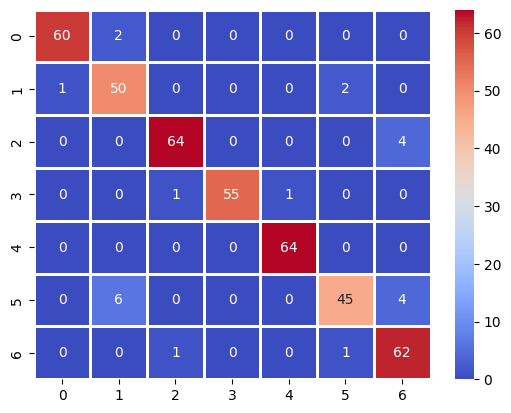

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


,Modelo_Versao,Acuracia,Recall_Media,Precision_Media,F1_Score_Media
0,Bayes_Primeiro,0.569740,0.56,0.58,0.53
1,Knn_Primeiro,0.869976,0.86,0.87,0.86
2,Gini_Primeiro,0.945626,0.94,0.95,0.94


In [15]:
classificador_decision_tree_gini = funcDecisionTreeGini(X_train, X_test, y_train)
print(classificador_decision_tree_gini)

funcPlotMatriz(y_test, classificador_decision_tree_gini)

df_metricas = funcMetricas('Gini_Primeiro',df_metricas, y_test, classificador_decision_tree_gini)

display(df_metricas)

#### Entropy

[2 5 2 0 6 3 2 4 0 1 4 0 6 1 0 2 0 5 0 0 6 4 2 2 5 2 4 0 1 0 2 5 2 2 2 2 5
 6 1 2 5 6 3 3 0 1 6 3 2 6 6 1 5 5 2 2 1 5 6 3 5 4 5 4 0 3 5 1 3 6 5 6 4 6
 2 5 5 6 6 2 0 5 0 4 2 0 0 3 6 3 1 0 6 5 1 6 4 1 4 2 1 1 4 0 0 1 1 6 2 3 6
 0 1 4 0 0 5 6 5 0 0 6 5 4 1 4 6 3 0 4 3 0 6 6 0 0 6 3 1 0 5 6 4 4 3 3 2 4
 4 2 4 4 5 1 3 3 6 6 0 0 3 0 6 3 4 1 0 4 6 6 0 6 6 6 6 2 3 1 5 6 6 1 6 4 2
 2 6 1 1 4 4 4 5 6 0 2 5 0 2 4 3 4 0 2 1 2 0 0 2 4 2 2 4 3 0 4 0 0 0 1 6 4
 3 2 6 5 4 3 2 6 4 1 6 5 0 2 2 3 4 2 5 6 0 5 6 1 1 0 0 6 2 0 4 6 2 2 0 4 4
 1 5 0 6 3 2 2 3 3 6 6 3 2 2 0 4 1 5 1 6 3 0 1 2 3 2 4 1 0 4 5 0 3 1 5 3 0
 0 3 2 3 5 1 5 6 5 1 0 5 0 1 4 6 3 5 1 0 3 0 0 3 6 4 1 5 2 2 4 4 1 2 1 2 1
 1 4 3 4 3 1 2 2 5 1 5 4 1 2 0 5 2 0 3 2 1 2 4 6 3 5 5 2 4 0 4 6 2 5 4 5 3
 3 6 3 6 2 5 2 6 3 3 0 4 4 2 1 0 0 4 4 4 1 4 6 6 1 4 3 4 4 0 3 2 5 3 2 4 6
 1 3 3 4 2 5 5 0 3 5 3 0 4 3 2 6]


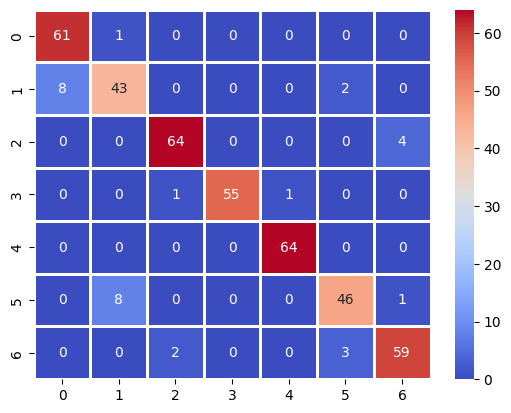

c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
c:\Users\arthurdomingos-ieg\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1521: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got 'macro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


,Modelo_Versao,Acuracia,Recall_Media,Precision_Media,F1_Score_Media
0,Bayes_Primeiro,0.569740,0.56,0.58,0.53
1,Knn_Primeiro,0.869976,0.86,0.87,0.86
2,Gini_Primeiro,0.945626,0.94,0.95,0.94
3,Entropy_Primeiro,0.926714,0.92,0.92,0.92


In [16]:
classificador_decision_tree_entropy = funcDecisionTreeEntropy(X_train, X_test, y_train)
print(classificador_decision_tree_entropy)

funcPlotMatriz(y_test, classificador_decision_tree_entropy)

df_metricas = funcMetricas('Entropy_Primeiro',df_metricas, y_test, classificador_decision_tree_entropy)

display(df_metricas)

## Comparação dos Modelos